## Features

In my model training process, I focused on creating effective features for predicting the near future in a cryptocurrency time series dataset, with a specific emphasis on day trading. To achieve this, I created a target that is suitable for predicting the next 24 hours' change in rate. If the change is within 2 percent, the model suggests that the user should HOLD. If the model predicts a rise in the next 24 hours, it recommends BUY, and otherwise, it advises SELL.

To capture the news sentiment for the past 24 hours, I used word embeddings, which are an effective way to represent words in a high-dimensional space, allowing the model to capture their semantic relationships. By incorporating these embeddings as features, my model can take into account the impact of news sentiment on cryptocurrency prices.

The figures below demonstrate the usability of these features for day trading, highlighting how they can help traders make informed decisions based on the predicted changes in price. Overall, my focus on creating effective features has allowed my model to make accurate predictions and provide valuable insights for day traders in the cryptocurrency market.

In [5]:
df.head()

,DATE_RW,RATE,VOLUME,CAP,LIQUIDITY,EMBD1,EMBD2,EMBD3,EMBD4,EMBD5,...,EMBD760,EMBD761,EMBD762,EMBD763,EMBD764,EMBD765,EMBD766,EMBD767,EMBD768,TARGET
0,2021-04-01 13:05:00,58948.852014,23078622653,1100613383851,1.789387e+09,-0.424708,0.296701,0.998906,-0.974825,0.847233,...,-0.389746,0.757367,-0.737769,-0.577346,-0.539853,-0.034955,0.999619,-0.9147,0.965867,BUY
1,2021-04-01 13:10:00,59109.689255,23225994302,1103616319692,1.756987e+09,-0.424708,0.296701,0.998906,-0.974825,0.847233,...,-0.389746,0.757367,-0.737769,-0.577346,-0.539853,-0.034955,0.999619,-0.9147,0.965867,HOLD
2,2021-04-01 13:15:00,59041.322344,23188994933,1102339865027,1.859002e+09,-0.424708,0.296701,0.998906,-0.974825,0.847233,...,-0.389746,0.757367,-0.737769,-0.577346,-0.539853,-0.034955,0.999619,-0.9147,0.965867,HOLD
3,2021-04-01 13:20:00,58951.327172,23184665789,1100659596669,1.856287e+09,-0.424708,0.296701,0.998906,-0.974825,0.847233,...,-0.389746,0.757367,-0.737769,-0.577346,-0.539853,-0.034955,0.999619,-0.9147,0.965867,BUY
4,2021-04-01 13:25:00,59019.446469,23180586805,1101931428215,1.852039e+09,-0.424708,0.296701,0.998906,-0.974825,0.847233,...,-0.389746,0.757367,-0.737769,-0.577346,-0.539853,-0.034955,0.999619,-0.9147,0.965867,BUY


Text(0.5, 0, 'Rate')

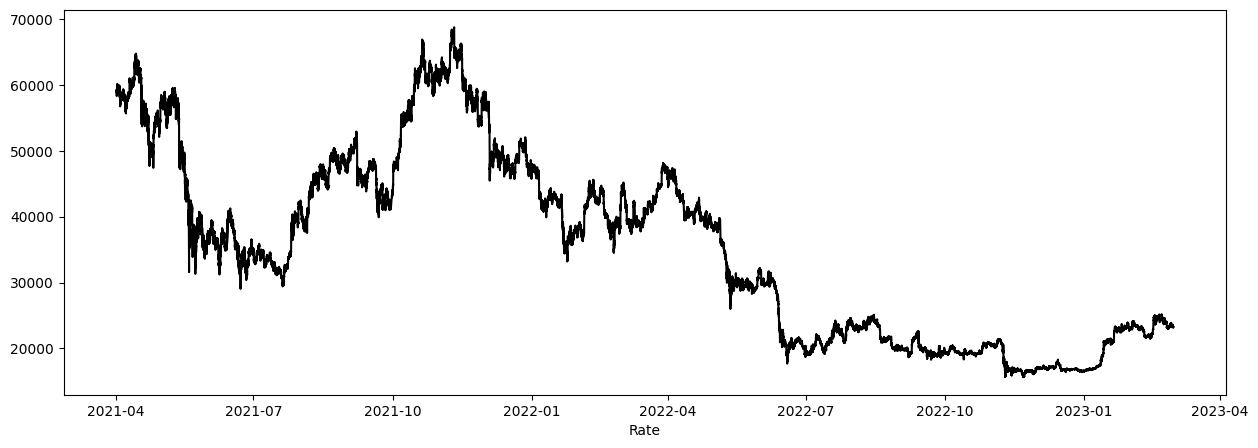

In [7]:
plt.figure(figsize=(15,5))
plt.plot(df['DATE_RW'],df['RATE'],color='black')
plt.xlabel('Date')
plt.ylabel('Rate')

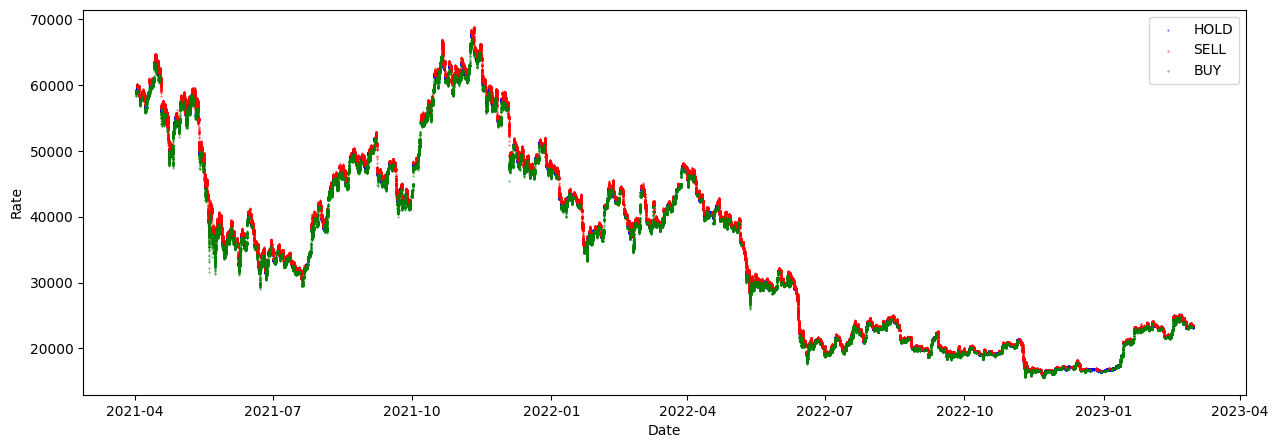

In [46]:
color_dict = {'HOLD': 'blue', 'SELL': 'red', 'BUY': 'green'}
plt.figure(figsize=(15,5))
for target, color in color_dict.items():
    mask = df['TARGET'] == target
    plt.scatter(df.loc[mask, 'DATE_RW'], df.loc[mask, 'RATE'], color=color, label=target,alpha=1, s=0.1)

plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.show()

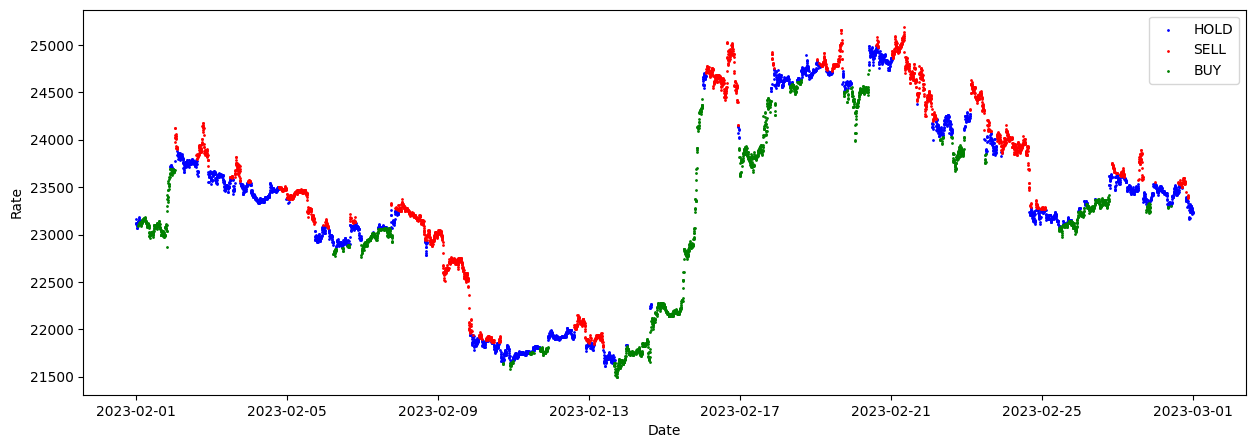

In [45]:
color_dict = {'HOLD': 'blue', 'SELL': 'red', 'BUY': 'green'}
plt.figure(figsize=(15,5))
df_zoomed=df[df['DATE_RW']>'2023-02-01 00:00:00']
for target, color in color_dict.items():
    mask = df['TARGET'] == target
    plt.scatter(df_zoomed.loc[mask, 'DATE_RW'], df_zoomed.loc[mask, 'RATE'], color=color, label=target,alpha=1, s=1)

plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.show()

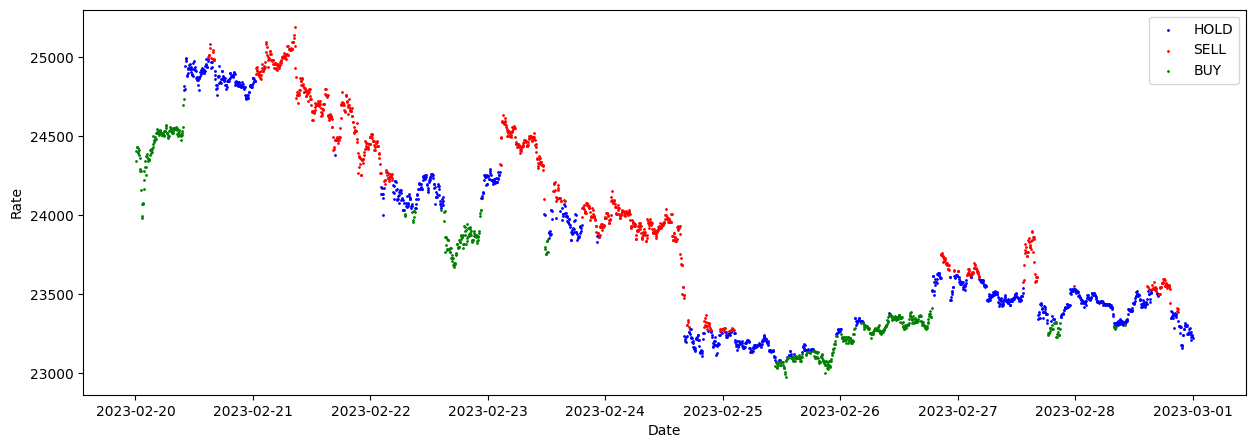

In [44]:
color_dict = {'HOLD': 'blue', 'SELL': 'red', 'BUY': 'green'}
plt.figure(figsize=(15,5))
df_zoomed=df[df['DATE_RW']>'2023-02-20 00:00:00']
for target, color in color_dict.items():
    mask = df['TARGET'] == target
    plt.scatter(df_zoomed.loc[mask, 'DATE_RW'], df_zoomed.loc[mask, 'RATE'], color=color, label=target,alpha=1, s=1)

plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.show()